# Unsupervised Learning for NBA Player Archetypes: Clustering Performance and Advanced Metrics
## Introduction

In this project, I will leverage unsupervised learning techniques to identify distinct clusters of NBA players based on their season-wide performance metrics. Using data sourced from the official NBA API, I will collect both traditional and advanced player statistics, preprocess the data, and apply clustering algorithms to uncover meaningful player archetypes.

## Data Collection & Provenance
The dataset will be obtained using the nba_api.stats.endpoints package, ensuring accuracy and reliability from the NBA’s official statistics database. Two key datasets will be extracted:

- **Traditional Statistics (leaguedashplayerstats):** Includes per-game metrics such as points, rebounds, assists, shooting efficiency, and defensive contributions.
- **Advanced Statistics (leaguedashplayerbiostats):** Provides deeper insights with metrics like net rating, usage percentage, true shooting percentage, and rebounding rates.
To ensure meaningful analysis, I will filter players based on a minimum number of games started, merging the datasets on PLAYER_ID to create a comprehensive player profile.

## Objective
The primary goal is to group NBA players into distinct clusters based on their performance attributes. By applying unsupervised learning algorithms such as K-Means, DBSCAN, and Hierarchical Clustering, I aim to:

- Identify player archetypes based on statistical similarities.
- Gain insights into playing styles and role distributions across the league.
- Provide potential applications for team roster optimization, scouting, and player valuation.
## Discussion & Next Steps
This project will explore different feature selection strategies and clustering approaches to refine player groupings. Further analysis may involve dimensionality reduction (e.g., PCA) to enhance interpretability. By discussing and iterating on clustering methods, I aim to uncover actionable insights into player performance trends in the NBA.

In [179]:
from nba_api.stats.endpoints import leaguedashplayerstats, leaguedashplayerbiostats
import pandas as pd

# Define Parameters
# Parameters
season = '2023-24'
season_type = 'Regular Season'
min_gs = 50 # minimum games started

# Step 1: Fetch player season-wide traditional stats
basic_stats = leaguedashplayerstats.LeagueDashPlayerStats(
    season=season,
    season_type_all_star=season_type,
    per_mode_detailed='PerGame'
)

advanced_stats = leaguedashplayerbiostats.LeagueDashPlayerBioStats(
    season=season,
    season_type_all_star=season_type,
    per_mode_simple='PerGame'
)

basic_df = basic_stats.get_data_frames()[0]
basic_df = basic_df[basic_df["GP"] >= min_gs]
basic_df = basic_df[["PLAYER_ID", "PLAYER_NAME", "MIN", "FGM", "FGA", "FG_PCT", "FG3M", "FG3A", "FG3_PCT", "FTM", "FTA", 
 "FT_PCT", "OREB", "DREB", "REB", "AST", "TOV", "STL", "BLK", "PF", "PTS", "PLUS_MINUS", "NBA_FANTASY_PTS"]]
advanced_df = advanced_stats.get_data_frames()[0]
advanced_df = advanced_df[advanced_df["GP"] >= min_gs]
advanced_df = advanced_df[["PLAYER_ID","NET_RATING","OREB_PCT","DREB_PCT","USG_PCT","TS_PCT","AST_PCT"]]
# Step 2: Fetch player biometric & physical attributes
#bio_stats = LeagueDashPlayerBioStats(season="2023-24").get_data_frames()[0]

# Step 3: Merge both datasets on PLAYER_ID
merged_df = basic_df.merge(advanced_df, on="PLAYER_ID", how="inner")

# Step 4: Filter players who started at least 10 games
#merged_df = merged_df[merged_df["GP"] >= 41]
print(merged_df.head())

   PLAYER_ID    PLAYER_NAME   MIN  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  \
0    1631260       AJ Green  11.0  1.5  3.5   0.423   1.2   3.0    0.408  0.3   
1     203932   Aaron Gordon  31.5  5.5  9.8   0.556   0.5   1.9    0.290  2.4   
2    1628988  Aaron Holiday  16.3  2.4  5.3   0.446   1.1   2.8    0.387  0.7   
3    1630174  Aaron Nesmith  27.7  4.4  8.8   0.496   1.9   4.6    0.419  1.5   
4    1630598  Aaron Wiggins  15.7  2.7  4.8   0.562   0.8   1.6    0.492  0.7   

   ...   PF   PTS  PLUS_MINUS  NBA_FANTASY_PTS  NET_RATING  OREB_PCT  \
0  ...  0.9   4.5         0.9              7.2         3.5     0.015   
1  ...  1.9  13.9         5.8             29.7         8.7     0.078   
2  ...  1.6   6.6         1.1             12.3         2.9     0.017   
3  ...  3.3  12.2         2.2             22.9         4.3     0.032   
4  ...  1.2   6.9         1.2             13.6         5.7     0.052   

   DREB_PCT  USG_PCT  TS_PCT  AST_PCT  
0     0.089    0.150   0.617    0.068  


# Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data
## Column Description
- **PLAYER_ID**: Unique identifier for each player.
- **PLAYER_NAME**: Name of the player (e.g., LeBron James, Kevin Durant).
- **MIN**: Total minutes played by the player during the game or season.
- **FGM**: Number of field goals (baskets) successfully made by the player.
- **FGA**: Total number of field goal attempts made by the player.
- **FG_PCT**: Field goal percentage, calculated as the ratio of successful field goals to total attempts.
- **FG3M**: Number of successful three-point shots made by the player.
- **FG3A**: Total number of three-point attempts made by the player.
- **FG3_PCT**: Three-point field goal percentage, calculated as the ratio of successful three-point shots to total three-point attempts.
- **FTM**: Number of successful free throws made by the player.
- **FTA**: Total number of free throw attempts made by the player.
- **FT_PCT**: Free throw percentage, calculated as the ratio of successful free throws to total free throw attempts.
- **OREB**: Number of offensive rebounds grabbed by the player (after their team misses a shot).
- **DREB**: Number of defensive rebounds grabbed by the player (after the opposing team misses a shot).
- **REB**: Total number of rebounds (offensive + defensive) grabbed by the player.
- **AST**: Total number of assists made by the player.
- **TOV**: Total number of turnovers committed by the player.
- **STL**: Number of steals made by the player.
- **BLK**: Number of blocks made by the player.
- **PF**: Number of personal fouls committed by the player.
- **PTS**: Total number of points scored by the player (sum of field goals, three-pointers, and free throws).
- **PLUS_MINUS**: Point differential when the player is on the court, indicating the team's performance relative to the opponent’s performance.
- **NBA_FANTASY_PTS**: NBA Fantasy points, which are based on various player statistics (e.g., points, rebounds, assists) used in fantasy basketball leagues.
- **NET_RATING**: The point differential per 100 possessions while the player is on the court, calculated as the difference between offensive and defensive ratings.
- **OREB_PCT**: Offensive rebound percentage, calculated as the ratio of offensive rebounds grabbed by the player to the total available offensive rebounds in the game.
- **DREB_PCT**: Defensive rebound percentage, calculated as the ratio of defensive rebounds grabbed by the player to the total available defensive rebounds in the game.
- **USG_PCT**: Usage percentage, indicating the percentage of team plays used by the player (e.g., shot attempts, free throws, turnovers).
- **TS_PCT**: True shooting percentage, an advanced shooting efficiency metric that accounts for field goals, three-point shots, and free throws.
- **AST_PCT**: Assist percentage, indicating the percentage of team assists attributed to the player.

## Feature Data Distribution
- **AST**: Several upper outliers with a distribution skewed to the left
- **AST_PCT**: Data Distribution is relativley normal
- **BLK**: Several upper outliers with a distribution skewed to the left
- **DREB**: Several upper outliers with a distribution skewed to the left
- **DREB_PCT**:Several upper outliers with a distribution skewed to the left
- **FG3A**: Several upper outliers with a distribution skewed to the left
- **FG3M**: Several upper outliers with a distribution skewed to the left
- **FG3_PCT**: Data Distribution is relativley normal
- **FGA**: Data Distribution is relativley normal
- **FGM**: Data Distribution is relativley normal
- **FG_PCT**: Data Distribution is relativley normal
- **FT_PCT**:  Data Distribution is skewed to the right
- **FTM**: Several upper outliers with a distribution skewed to the left
- **FTA**: Several upper outliers with a distribution skewed to the left
- **MIN**: Data Distribution is relativley normal
- **NBA_FANTASY_PTS**:  Several upper outliers with a distribution skewed to the left
- **NET_RATING**:  Several upper outliers with a distribution skewed to the left
- **OREB**:  Several upper outliers with a distribution skewed to the left
- **OREB_PCT**: Data Distribution is skewed to the right
- **PF**: Data distribution is normal
- **PLUS_MINUS**: Data distribution is normal
- **PTS**: Data distribution is normal
- **REB**: Several upper outliers with a distribution skewed to the left
- **STL**: Several upper outliers with a distribution skewed to the left
- **TOV**: Data distribution is normal
- **TS_PCT**: Data distribution is normal
- **USG_PCT**: Data distribution is normal


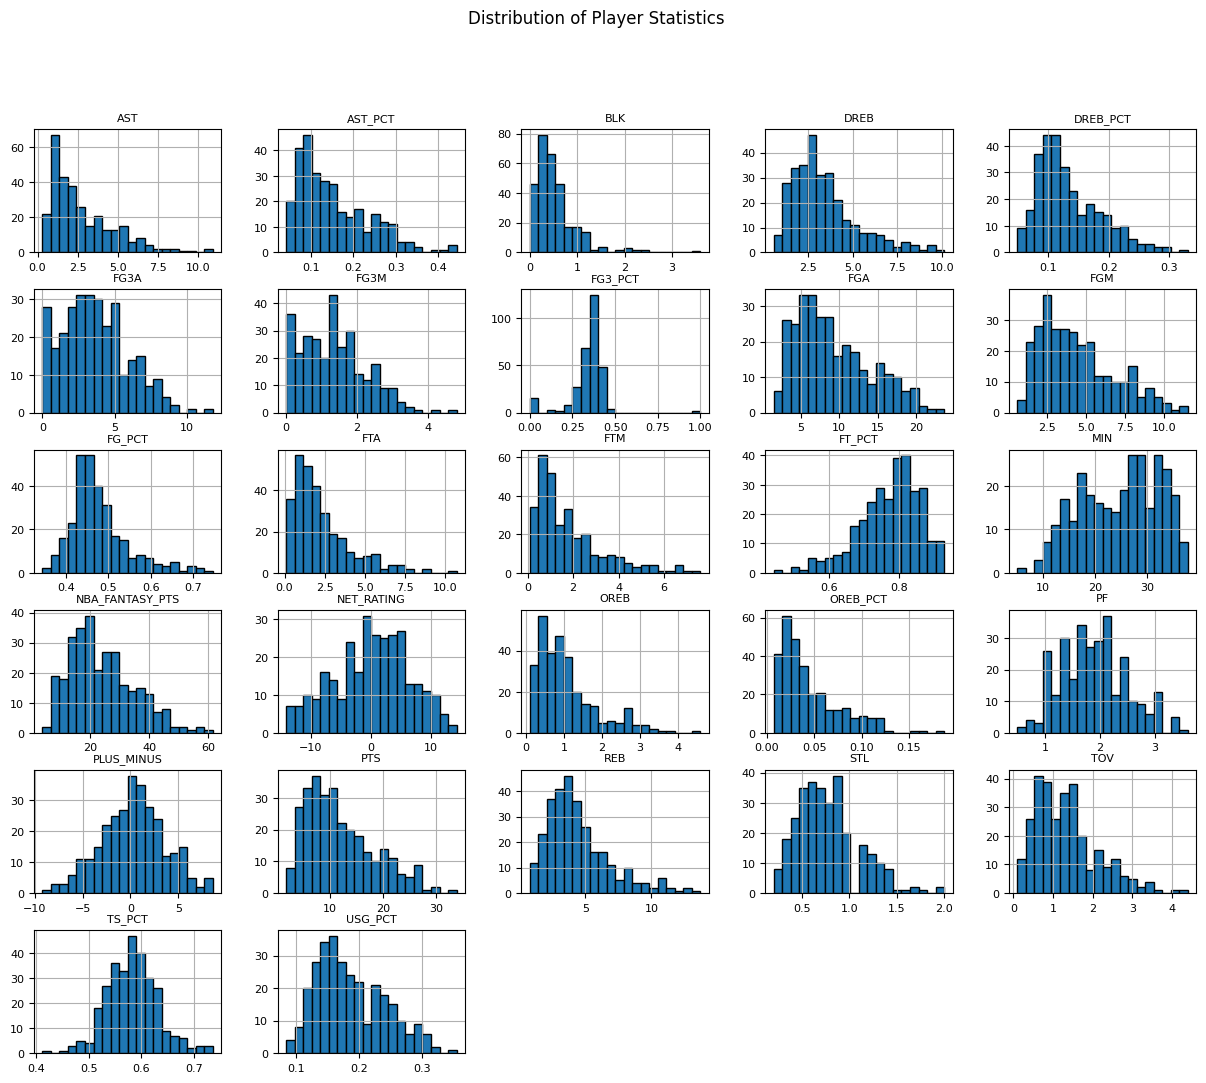

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

eda_columns = merged_df.columns.difference(["PLAYER_ID", "PLAYER_NAME"])

# Plot histograms for all numerical columns
plt.rc('axes', titlesize=8) 
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
merged_df[eda_columns].hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle("Distribution of Player Statistics", fontsize=12) 
plt.show()

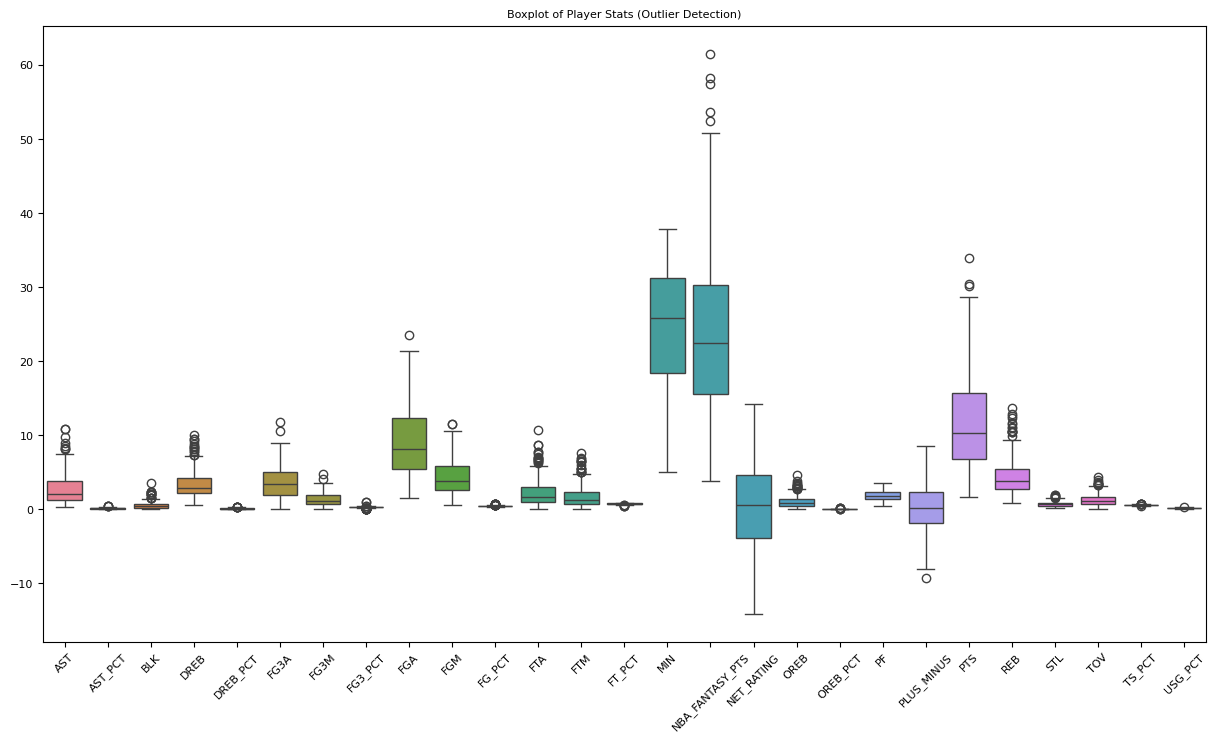

In [168]:
# Boxplot for all numerical columns
plt.figure(figsize=(15, 8))
sns.boxplot(data=merged_df[eda_columns])
plt.title("Boxplot of Player Stats (Outlier Detection)")
plt.xticks(rotation=45)
plt.show()

## Correlation
I want to focus on the top 10 strongest correlations observed in the dataset, which show clear relationships between certain features:

1. **FGM and PTS (0.988907):** Strongly correlated because more field goals made (FGM) lead directly to more points scored (PTS).

2. **PTS and FGM (0.988907):** The inverse of the above, confirming points scored are driven by field goals.

3. **FTA and FTM (0.988140):** High correlation indicates that players who attempt more free throws (FTA) typically make more of them (FTM).

4. **FTM and FTA (0.988140):** Similar to the previous, confirming that more attempts lead to more successful free throws.

5. **FG3M and FG3A (0.987471):** Strong correlation, as more three-point attempts (FG3A) generally result in more three-pointers made (FG3M).

6. **FG3A and FG3M (0.987471):** The inverse, showing the relationship between attempts and successful shots.

7. **PTS and FGA (0.983155):** More field goal attempts (FGA) generally lead to more points scored (PTS), though less directly than field goals made.

8. **FGA and PTS (0.983155):** Similar to above, showing that more attempts correlate with more points.

9. **REB and DREB (0.972958):** Strong correlation because defensive rebounds (DREB) contribute significantly to total rebounds (REB).

10. **DREB and REB (0.972958):** Reinforces the relationship between defensive rebounds and total rebounds.

### Justification:
* The correlations make sense based on basketball mechanics. Field goals, free throws, and three-pointers are primary scoring methods, and attempts usually correlate with successes.
* Rebounds are also highly related, with defensive rebounds being a key contributor to total rebounds.

These strong correlations suggest that the variables are directly connected through gameplay mechanics, making them logically correlated.

FGM   PTS     0.988907
PTS   FGM     0.988907
FTA   FTM     0.988140
FTM   FTA     0.988140
FG3M  FG3A    0.987471
FG3A  FG3M    0.987471
PTS   FGA     0.983155
FGA   PTS     0.983155
REB   DREB    0.972958
DREB  REB     0.972958
dtype: float64


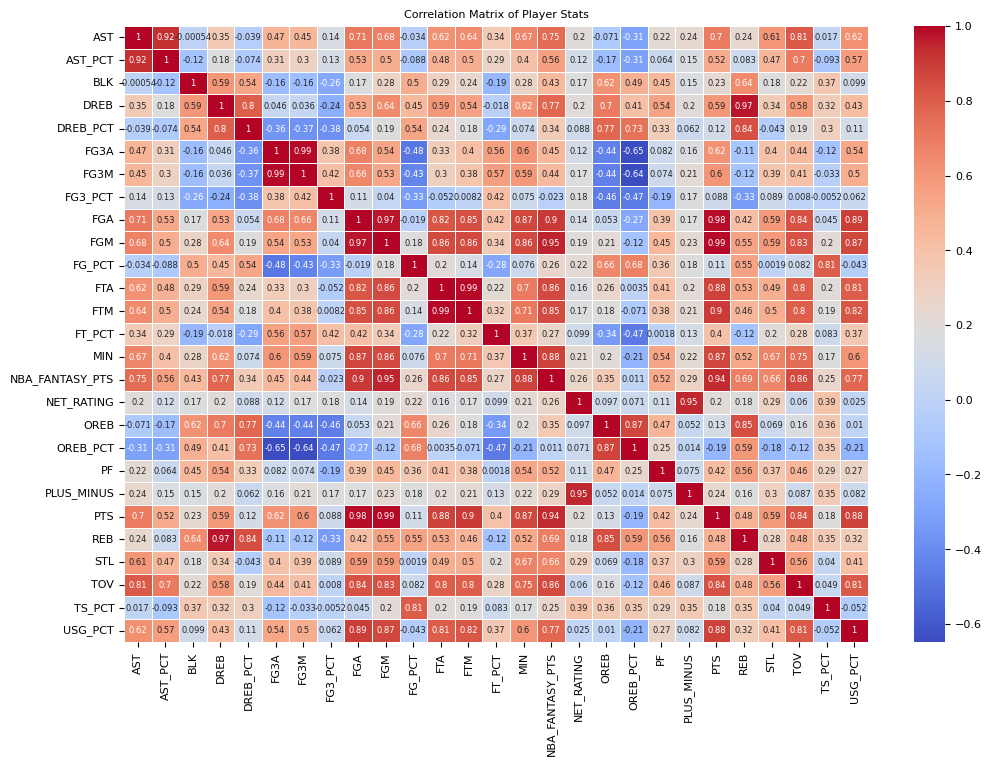

In [169]:
# Compute correlation matrix
correlation_matrix = merged_df[eda_columns].corr()

# Create a mask to exclude self-correlations (i.e., correlation = 1)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Find the absolute values of the correlation matrix
correlation_matrix_abs = correlation_matrix.abs()

# Unstack the matrix to get a flat list of pairs and their correlation values
correlation_pairs = correlation_matrix_abs.unstack()

# Remove the self-correlations (where the pair is the same variable)
correlation_pairs = correlation_pairs[correlation_pairs < 1]

# Sort the correlations in descending order to find the strongest correlations
top_10_correlations = correlation_pairs.sort_values(ascending=False).head(10)

# Print the top 10 strongest correlations
print(top_10_correlations)

# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, annot_kws={"size": 6})
plt.title("Correlation Matrix of Player Stats")
plt.show()

## Data Transformation for Clustering
When using clustering techniques like K-means, DBSCAN, and hierarchical clustering, it is crucial to ensure that the features in the dataset are appropriately transformed, particularly when there are significant differences in their ranges or units. These algorithms rely on distance-based measures (such as Euclidean distance), and if features are not scaled correctly, those with larger ranges or units could disproportionately influence the clustering results.

To address this, I applied standardization (Z-score normalization) to the dataset. Standardization scales each feature so that it has a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the clustering process, regardless of their original scale or unit of measurement. For example, features like MIN (minutes played) and FG_PCT (field goal percentage) have different scales—minutes versus percentages—which could lead to one feature dominating the distance calculations. Standardization resolves this issue by transforming them to the same scale.

While outliers can significantly impact clustering algorithms like DBSCAN (which is sensitive to density), I chose to retain the outliers in the dataset. Outliers can represent rare, but important, patterns that may contribute meaningfully to the clustering process. For instance, extreme values in features like PTS (points scored) or FG3M (three-point shots made) may highlight exceptional player performances or specific play styles that could be critical for identifying distinct clusters. Instead of removing or adjusting these outliers, I opted to keep them in the dataset to ensure the clusters are reflective of all player behaviors, including those that are less common but still valuable.

Additionally, I checked the dataset for missing data, and it was confirmed that there are no missing values in the dataset. This means no additional data imputation or handling of missing values is necessary.

In conclusion, all features were scaled using standardization to ensure equal contribution to the clustering results, while retaining outliers to preserve important, though potentially rare, data points. These transformations help improve the accuracy and interpretability of the clustering results, leading to more meaningful groupings that capture the full range of player performance.

In [170]:
from sklearn.preprocessing import StandardScaler
missing_data = merged_df.isnull().sum()

# Display the missing data for each column
print("Missing data per column:")

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to your selected columns (eda_columns) and standardize the data
scaled_data = scaler.fit_transform(merged_df[eda_columns])

# Convert the scaled data back to a DataFrame, maintaining the original column names
scaled_df = pd.DataFrame(scaled_data, columns=eda_columns)

# If you want to overwrite the original dataframe with the scaled values, you can do this:
merged_df[eda_columns] = scaled_df

# Optionally, check the first few rows of the scaled data
print(scaled_df.head())


Missing data per column:
        AST   AST_PCT       BLK      DREB  DREB_PCT      FG3A      FG3M  \
0 -1.147749 -1.017943 -0.935172 -1.323822 -0.853916 -0.269089 -0.147543   
1  0.364827 -0.065377  0.142496  0.387773 -0.092969 -0.749647 -0.924724   
2 -0.492299  0.055202 -0.935172 -1.158183 -1.120247 -0.356463 -0.258569   
3 -0.643557 -1.030001  0.358029 -0.274780 -0.587585  0.429904  0.629639   
4 -0.845233 -0.680325 -0.719638 -0.992545 -0.739774 -0.880709 -0.591646   

    FG3_PCT       FGA       FGM  ...      OREB  OREB_PCT        PF  \
0  0.600085 -1.194747 -1.234885  ... -1.112590 -0.920043 -1.653580   
1 -0.488355  0.119101  0.461796  ...  1.696245  1.042253  0.009948   
2  0.406380 -0.819362 -0.853132  ... -0.984916 -0.857748 -0.489110   
3  0.701550 -0.089447 -0.004791  ... -0.218870 -0.390534  2.338888   
4  1.374907 -0.923636 -0.725881  ... -0.346545  0.232417 -1.154522   

   PLUS_MINUS       PTS       REB       STL       TOV    TS_PCT   USG_PCT  
0    0.197938 -1.138271 -1.

## Wrapping Up the Exploratory Data Analysis (EDA)
In conclusion, the Exploratory Data Analysis (EDA) has provided a comprehensive understanding of the dataset, ensuring that all necessary data transformations were applied to optimize the clustering process. Specifically, I standardized the features to ensure that no one feature disproportionately influenced the clustering results, and I opted to retain outliers to capture important patterns in player performance, even if they are rare. I also confirmed that there is no missing data, which means no further imputation was required.

Looking ahead, it is important to consider which factors might play a more significant role in the clustering analysis. Based on the correlations observed earlier, factors such as FGM (field goals made) and PTS (points scored) show a very strong correlation, suggesting that these features will likely be central in distinguishing player performance in the clusters. FG3M (three-point shots made) and FG3A (three-point attempts) may also be key factors, as they directly relate to a player's shooting style and overall offensive capabilities. Other features like REB (rebounds) and DREB (defensive rebounds) might help in understanding a player's overall contribution to the team's success beyond scoring.

By focusing on these important factors, I will be able to confirm my assumptions and gain deeper insights into player performance patterns when I finalize the clustering analysis.

# Perform Analysis Using Unsupervised Learning Model
## Principal Component Analysis (PCA) for Dimensionality Reduction
To reduce the dimensionality of the dataset while retaining key information, Principal Component Analysis (PCA) was applied to the standardized data. The original dataset contained 27 features. PCA identifies principal components—linear combinations of the original features that capture the most variance in the data.

1. **Fitting PCA:** PCA was applied to the standardized dataset, and the explained variance ratio for each principal component was calculated to assess how much variance each component explains.

2. **Cumulative Variance Plot:** A plot of cumulative explained variance was generated to determine how many components are needed to explain a desired percentage of the variance (99% in this case).

3. **Optimal Components Selection:** The number of components required to capture 99% of the variance was identified as 15, based on the cumulative variance plot.

4. **Data Transformation:** The data was then transformed into the reduced feature space using the selected number of components, preserving most of the original information.

**Key Outcomes:**
* Explained Variance: The first few components captured the majority of the variance.
* Reduced Dimensions: The dataset was reduced from 27 features to 15 components, maintaining essential information for further analysis.
PCA effectively reduced dimensionality, making clustering more efficient without losing significant data.

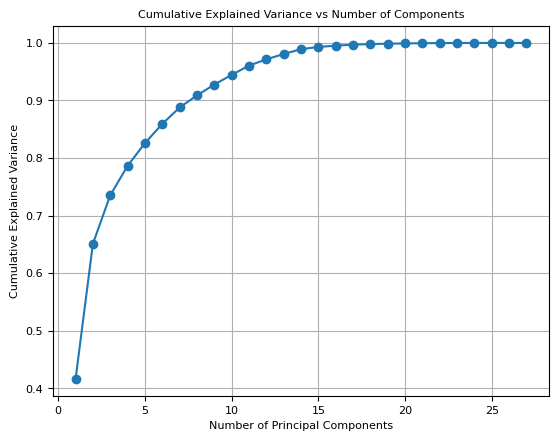

Number of components to explain 99.0% variance: 15
Explained Variance Ratio:
[0.41634452 0.23487142 0.08412134 0.05114365 0.03948775 0.03338324
 0.02848544 0.02108637 0.01867868 0.01693304 0.01604131 0.01094645
 0.00921704 0.0084155  0.00384252]
Cumulative Explained Variance:
[0.41634452 0.65121594 0.73533728 0.78648093 0.82596868 0.85935192
 0.88783735 0.90892372 0.9276024  0.94453545 0.96057676 0.97152321
 0.98074025 0.98915575 0.99299826 0.99519294 0.99698684 0.99793579
 0.99868123 0.99914795 0.99952424 0.99973671 0.99991759 0.99998364
 0.99999233 0.99999776 1.        ]
PCA Transformed Data:
[[-4.67532248 -2.05799197  1.60721044 ...  0.20749133 -0.03754413
   0.12249312]
 [ 1.29327427  2.6284165   1.45869693 ... -1.40426786 -0.25625172
   0.106685  ]
 [-2.97381194 -2.1324085   1.08553153 ...  0.08290412 -0.38680741
  -0.02639664]
 ...
 [-5.09578359  1.15382654 -2.01596772 ... -0.50486839  0.32822788
  -0.13002254]
 [-1.95461507 -1.27223441 -2.3768302  ...  0.56630243  0.09256033
   

In [171]:
from sklearn.decomposition import PCA

# Fit PCA to your data
pca = PCA()
pca.fit(scaled_data)  # scaled_data is your standardized dataset

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot cumulative variance explained
cumulative_variance = explained_variance_ratio.cumsum()

# Plot to visualize the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

# Choose the number of components where cumulative variance reaches your threshold
threshold = 0.99  # For example, 99% variance
n_components = next(i for i, c in enumerate(cumulative_variance) if c >= threshold) + 1
print(f"Number of components to explain {threshold*100}% variance: {n_components}")

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

# Print PCA components and explained variance
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)
print("Cumulative Explained Variance:")
print(cumulative_variance)

# The transformed data (PCA data)
print("PCA Transformed Data:")
print(pca_data)


## K-Means
I applied K-means clustering to the dataset, optimizing the number of clusters using the Elbow Method and the Silhouette Score. I also visualized the resulting clusters in a 2D feature space.

### Hyperparameter Optimization
1. **Elbow Method:** I calculated the Within-Cluster Sum of Squares (WCSS) for k values between 2 and 10. The optimal k is typically identified at the "elbow" point, where WCSS shows diminishing returns with more clusters.

2. **Silhouette Score:** I computed the Silhouette Score for each k value, which measures the quality of the clustering. Higher values indicate better-separated clusters.

The elbow method determined the optimal amount of clusters was 4, while the Silhouette Score was actually slighly better at 3 clusters. After considering both options, I decided to use 4 clusters

### K-means Clustering and Visualization
Using k=4, I applied the K-means algorithm, grouping the data into four clusters. The resulting clusters were visualized in a 2D scatter plot, with each data point color-coded by its cluster label. This visualization allowed us to clearly observe the distribution and separation of clusters in the feature space.

### Conclusion
Based on the Elbow and Silhouette methods, I selected k=4 as the optimal number of clusters. The K-means algorithm effectively grouped the data, and the clusters were visualized in a 2D plot, revealing clear distinctions between the groups.

[0.2744419609602515, 0.27507257834488325, 0.20799051265025956, 0.18502058325874116, 0.1638804633578656, 0.14332034886307712, 0.13368697746536023, 0.13439326880734584, 0.13420164999664683]


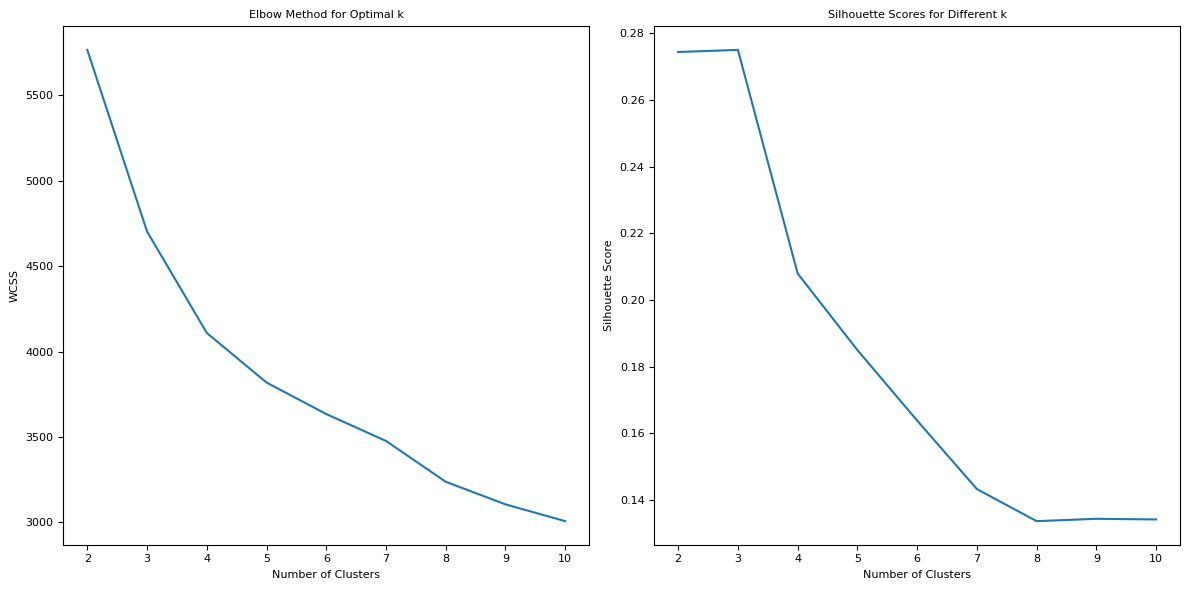

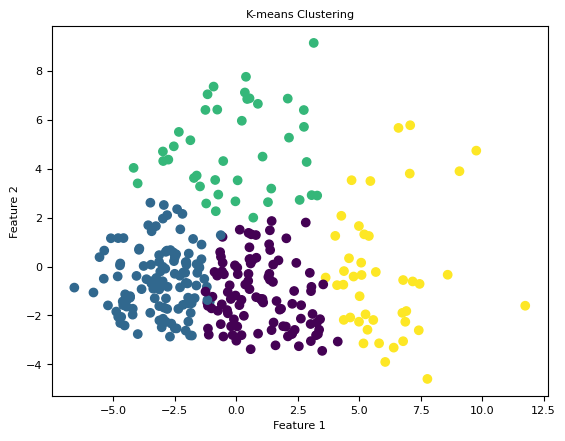

In [172]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score


# Function to plot clusters
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

### 1. **K-means Clustering with Hyperparameter Optimization**
# Hyperparameter optimization using the Elbow Method and Silhouette Score

# Try different values of k (number of clusters)
wcss = []
sil_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(pca_data, kmeans.labels_))

print(sil_scores)
# Plotting the Elbow Method
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), sil_scores)
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pca_data)
kmeans_labels = kmeans.labels_

# Plotting K-means clusters
plot_clusters(pca_data, kmeans_labels, 'K-means Clustering')





## K-Means Cluster Analysis
Based on the grouping, we can describe each cluster as follows:

1. **Cluster 0: Role Players**
    - This cluster consists of players who might not be the stars of their respective teams but are essential contributors. These players are versatile and provide solid performances in various roles, whether it’s as shooters, defenders, or facilitators. They are typically players who bring stability and depth to their teams, providing solid contributions across different aspects of the game. Examples include players like Bradley Beal, D'Angelo Russell, and Fred VanVleet, who can step up in multiple areas but aren’t necessarily the focal point of their team’s offense.
2. **Cluster 1: Lower Quality Players**
    - This group contains players who may struggle to make a significant impact in the NBA. These players might be younger or still developing, or they may be inconsistent contributors at best. While some could become key players in the future, their current roles are typically limited, and they are often seen as lower-tier players. Notable members of this cluster include players like AJ Green, Andre Jackson Jr., and Blake Wesley, who are likely still fighting for a consistent spot on an NBA roster or are at the early stages of their careers.

3. **Cluster 2: Traditional Big Men**
    - This cluster includes players who are known for their presence in the paint, both offensively and defensively. These players are typically big men who excel in rebounding, shot-blocking, and providing interior defense. Their offensive roles may not be as prominent, but their impact on the defensive end of the court is significant. Examples of players in this cluster include Clint Capela, Rudy Gobert, and Nikola Vučević, who are essential for their team’s defensive schemes and rebounding efforts.

4. **Cluster 3: Superstars**
    - The final cluster consists of the league’s superstars. These players are the face of their teams, and their performances often dictate the success of their franchises. They are highly skilled in multiple facets of the game, and their names are often in the MVP conversation. This cluster includes some of the most talented and well-known players in the league, such as Giannis Antetokounmpo, LeBron James, and Luka Dončić. These players are the primary scoring options for their teams and are often the focal points of their team’s strategy.
This clustering approach effectively separates the players based on their roles, skills, and impact within the NBA.


Players in Each Cluster:
Cluster
0    [Aaron Nesmith, Al Horford, Alex Caruso, Andrew Nembhard, Andrew Wiggins, Austin Reaves, Ayo Dosunmu, Bennedict Mathurin, Bogdan Bogdanović, Bojan Bogdanović, Bradley Beal, Brandin Podziemski, Brandon Miller, Brook Lopez, Bruce Brown, Buddy Hield, CJ McCollum, Caleb Martin, Cam Thomas, Cameron Johnson, Caris LeVert, Chris Paul, Coby White, Cole Anthony, Collin Sexton, Corey Kispert, D'Angelo Russell, Darius Garland, De'Andre Hunter, Deni Avdija, Dennis Schröder, Derrick White, Devin Vassell, Dillon Brooks, Donte DiVincenzo, Draymond Green, Duncan Robinson, Eric Gordon, Fred VanVleet, Gary Trent Jr., Grant Williams, Grayson Allen, Harrison Barnes, Herbert Jones, Immanuel Quickley, Jabari Smith Jr., Jaden Ivey, Jaden McDaniels, Jaime Jaquez Jr., Jalen Green, Jalen Johnson, Jalen Suggs, Jalen Williams, Jerami Grant, Jeremy Sochan, Jonathan Kuminga, Jordan Clarkson, Jordan Poole, Josh Giddey, Josh Hart, Jrue Holiday, Keegan Murray, Keldon Johnson, Kel

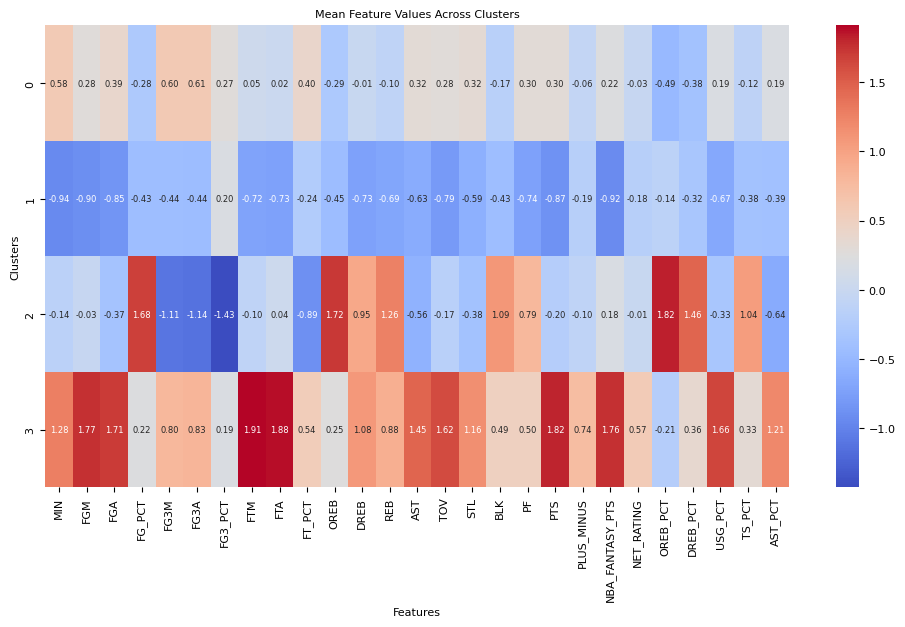

In [173]:
player_names = merged_df['PLAYER_NAME'].values

# Create a DataFrame with player names and their corresponding cluster labels
kmeans_clustered_players = pd.DataFrame({
    'Player': player_names,
    'Cluster': kmeans_labels
})

# Group by the cluster and display the players in each cluster
pd.set_option('display.max_rows', None)  # Show all rows in the output
pd.set_option('display.max_colwidth', None)  # Show full content of columns

# Now, print the players in each cluster
print("\nPlayers in Each Cluster:")
print(kmeans_clustered_players.groupby('Cluster')['Player'].apply(list))


# Get the mean statistics for each cluster for all features (ignoring the player name and cluster columns)
merged_df['Kmeans_Cluster'] = kmeans_labels
mean_features = merged_df.drop(columns=['PLAYER_ID', 'PLAYER_NAME']).groupby('Kmeans_Cluster').mean()

# Plot the mean values for each feature across the clusters
plt.figure(figsize=(12, 6))

# Use seaborn to create a heatmap for visualizing the mean values
sns.heatmap(mean_features, annot=True, cmap='coolwarm', fmt='.2f',  annot_kws={"size": 6})

plt.title('Mean Feature Values Across Clusters')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.xticks(rotation=90)
plt.show()



### Hierarchical Clustering
I applied Hierarchical Clustering to the dataset, optimizing the number of clusters using the Elbow Method and the Silhouette Score. I also visualized the resulting clusters in a 2D feature space.

#### Hyperparameter Optimization
- **Elbow Method**: For Hierarchical Clustering, this method involves calculating the within-cluster sum of squares (WCSS) for a range of k values between 2 and 10. The optimal k is identified at the "elbow" point, where WCSS shows diminishing returns as the number of clusters increases.

- **Silhouette Score**: I computed the Silhouette Score for each k value, which measures the quality of clustering. Higher values indicate better-separated clusters, providing insight into the compactness and separation of the clusters.

Through the **Elbow Method**, I observed that the optimal k is around 4 clusters, as WCSS shows diminishing returns beyond this point. The Silhouette Score also suggested that the best clustering solution is achieved with 4 clusters, indicating that this number provides well-separated clusters.

#### Hierarchical Clustering and Visualization
Using k=4, I applied the AgglomerativeClustering algorithm, grouping the data into four clusters. The resulting clusters were visualized in a 2D scatter plot, where each data point was color-coded based on its cluster label. This visualization enabled a clear understanding of the cluster distribution and separation in the feature space.

#### Conclusion
Based on the Elbow Method and Silhouette Scor*, I selected k=4 as the optimal number of clusters. Hierarchical Clustering effectively grouped the data, and the clusters were visualized in a 2D plot, revealing distinct separations between the groups. This method provided a useful insight into the structure of the data, especially in terms of its natural hierarchical relationships.


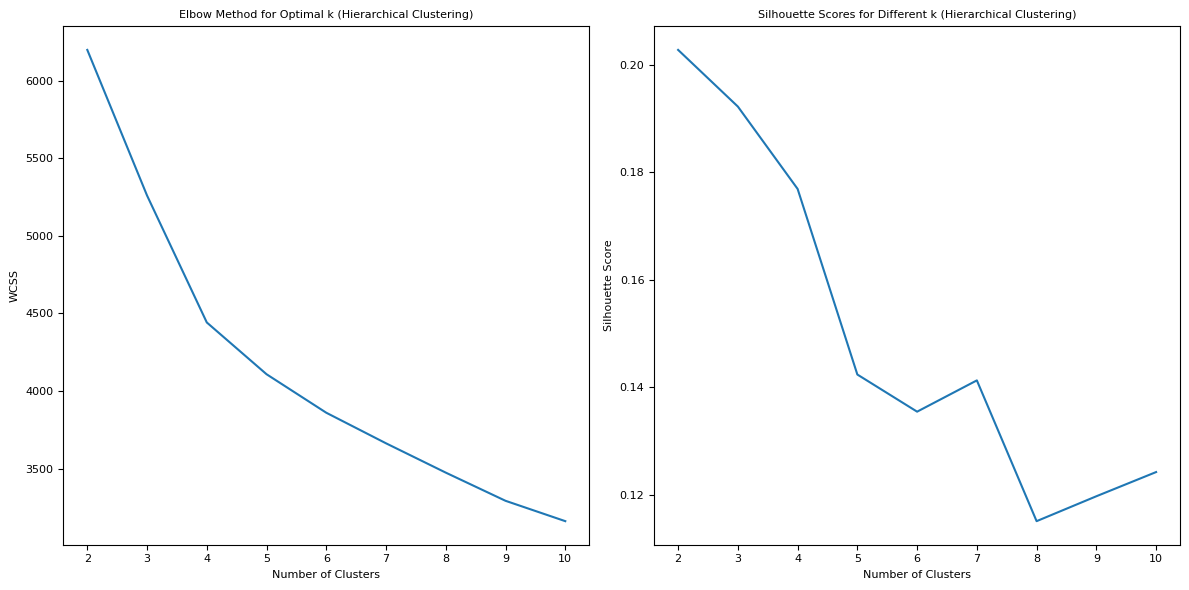

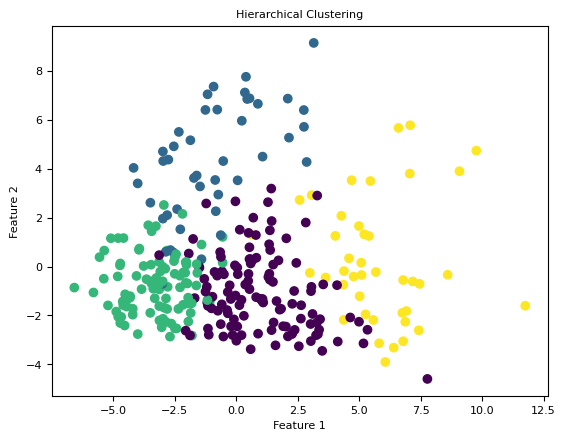

In [174]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Function to plot clusters
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# 1. **Hierarchical Clustering with Hyperparameter Optimization**

# Try different values of k (number of clusters) for hierarchical clustering
sil_scores = []
wcss = []

for i in range(2, 11):  # Try different k from 2 to 10
    # Perform Hierarchical clustering (AgglomerativeClustering)
    hierarchical_clustering = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='ward')
    labels = hierarchical_clustering.fit_predict(pca_data)
    
    # Calculate silhouette score
    sil_score = silhouette_score(pca_data, labels)
    sil_scores.append(sil_score)
    
    # Calculate WCSS (within-cluster sum of squares)
    cluster_centers = np.array([pca_data[labels == j].mean(axis=0) for j in range(i)])
    total_wcss = 0
    for j in range(i):
        total_wcss += np.sum(np.linalg.norm(pca_data[labels == j] - cluster_centers[j], axis=1) ** 2)
    wcss.append(total_wcss)

# Plotting the Elbow Method (WCSS) and Silhouette Scores for hierarchical clustering
plt.figure(figsize=(12, 6))

# Plot Elbow Method
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method for Optimal k (Hierarchical Clustering)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), sil_scores)
plt.title('Silhouette Scores for Different k (Hierarchical Clustering)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


# Fit the model with optimal k (For example, k = 4 based on silhouette score)
hierarchical_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical_clustering.fit_predict(pca_data)

# Plotting Hierarchical Clustering
plot_clusters(pca_data, hierarchical_labels, 'Hierarchical Clustering')

## Hierarchical Cluster Analysis
Based on the grouping, we can describe each cluster as follows:

1. **Cluster 0: Role Players**
    - This cluster consists of players who might not be the stars of their respective teams but are essential contributors. These players are versatile and provide solid performances in various roles, whether it’s as shooters, defenders, or facilitators. They are typically players who bring stability and depth to their teams, providing solid contributions across different aspects of the game. Examples include players like Bradley Beal, D'Angelo Russell, and Fred VanVleet, who can step up in multiple areas but aren’t necessarily the focal point of their team’s offense.
2. **Cluster 1: Lower Quality Players**
    - This group contains players who may struggle to make a significant impact in the NBA. These players might be younger or still developing, or they may be inconsistent contributors at best. While some could become key players in the future, their current roles are typically limited, and they are often seen as lower-tier players. Notable members of this cluster include players like AJ Green, Andre Jackson Jr., and Blake Wesley, who are likely still fighting for a consistent spot on an NBA roster or are at the early stages of their careers.

3. **Cluster 2: Traditional Big Men**
    - This cluster includes players who are known for their presence in the paint, both offensively and defensively. These players are typically big men who excel in rebounding, shot-blocking, and providing interior defense. Their offensive roles may not be as prominent, but their impact on the defensive end of the court is significant. Examples of players in this cluster include Clint Capela, Rudy Gobert, and Nikola Vučević, who are essential for their team’s defensive schemes and rebounding efforts.

4. **Cluster 3: Superstars**
    - The final cluster consists of the league’s superstars. These players are the face of their teams, and their performances often dictate the success of their franchises. They are highly skilled in multiple facets of the game, and their names are often in the MVP conversation. This cluster includes some of the most talented and well-known players in the league, such as Giannis Antetokounmpo, LeBron James, and Luka Dončić. These players are the primary scoring options for their teams and are often the focal points of their team’s strategy.
This clustering approach effectively separates the players based on their roles, skills, and impact within the NBA.


Players in Each Cluster:
Cluster
0    [Aaron Gordon, Aaron Nesmith, Alex Caruso, Andrew Nembhard, Andrew Wiggins, Austin Reaves, Ayo Dosunmu, Bennedict Mathurin, Bilal Coulibaly, Bobby Portis, Bogdan Bogdanović, Bojan Bogdanović, Bradley Beal, Brandin Podziemski, Brandon Miller, Bruce Brown, Buddy Hield, CJ McCollum, Cade Cunningham, Caleb Martin, Cam Thomas, Cameron Johnson, Caris LeVert, Chris Paul, Coby White, Cole Anthony, Collin Sexton, Corey Kispert, D'Angelo Russell, Darius Garland, De'Andre Hunter, Dejounte Murray, Deni Avdija, Dennis Schröder, Derrick White, Devin Vassell, Dillon Brooks, Donte DiVincenzo, Dorian Finney-Smith, Draymond Green, Duncan Robinson, Duop Reath, Eric Gordon, Fred VanVleet, Gary Trent Jr., Georges Niang, Gordon Hayward, Grant Williams, Grayson Allen, Harrison Barnes, Herbert Jones, Immanuel Quickley, Jabari Smith Jr., Jabari Walker, Jaden Ivey, Jaden McDaniels, Jaime Jaquez Jr., Jalen Green, Jalen Johnson, Jalen Suggs, Jalen Williams, James Harden, Jer

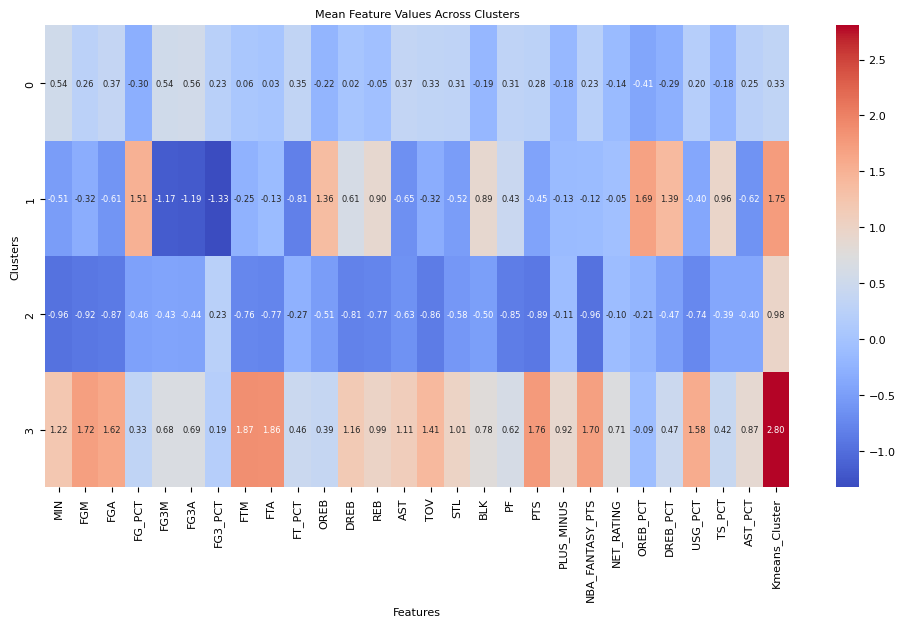

In [175]:
player_names = merged_df['PLAYER_NAME'].values

# Create a DataFrame with player names and their corresponding cluster labels
hier_clustered_players = pd.DataFrame({
    'Player': player_names,
    'Cluster': hierarchical_labels
})

# Group by the cluster and display the players in each cluster
pd.set_option('display.max_rows', None)  # Show all rows in the output
pd.set_option('display.max_colwidth', None)  # Show full content of columns

# Now, print the players in each cluster
print("\nPlayers in Each Cluster:")
print(hier_clustered_players.groupby('Cluster')['Player'].apply(list))


# Get the mean statistics for each cluster for all features (ignoring the player name and cluster columns)
merged_df['hier_Cluster'] = hierarchical_labels
mean_features = merged_df.drop(columns=['PLAYER_ID', 'PLAYER_NAME']).groupby('hier_Cluster').mean()

# Plot the mean values for each feature across the clusters
plt.figure(figsize=(12, 6))

# Use seaborn to create a heatmap for visualizing the mean values
sns.heatmap(mean_features, annot=True, cmap='coolwarm', fmt='.2f',  annot_kws={"size": 6})

plt.title('Mean Feature Values Across Clusters')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.xticks(rotation=90)
plt.show()

## DBSCAN

I applied **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) to the dataset, optimizing the hyperparameters **epsilon (eps)** and **min_samples** to achieve the best clustering results. DBSCAN is a density-based clustering algorithm that groups closely packed points while marking points in sparse regions as noise.

#### Hyperparameter Optimization

To find the optimal parameters, I used a **grid search** approach over a range of epsilon values and minimum sample sizes for the **min_samples** parameter. The **epsilon (eps)** parameter controls the maximum distance between two samples for them to be considered as part of the same neighborhood, while **min_samples** represents the minimum number of points required to form a dense region (a cluster).

The parameter grid was set as follows:
- **eps**: I tested a range of values from 1 to 10, incrementing by 1.
- **min_samples**: I tested values from 10 to 100, in increments of 10.

For each combination of **eps** and **min_samples**, the **DBSCAN** algorithm was applied, and the clustering labels were obtained. The **Silhouette Score** was then calculated to assess the quality of the clusters. The **Silhouette Score** ranges from -1 to 1, with higher values indicating better-defined clusters.

I only computed the Silhouette Score when the algorithm identified more than one cluster, as DBSCAN may assign all points to a single cluster or label some as noise (label -1).

#### Best Parameter Selection

The combination of **eps** and **min_samples** that provided the highest Silhouette Score was selected as the optimal set of parameters for **DBSCAN**. After performing the grid search, the best parameters were found to be:

- **eps** = [best_eps_value] (from the grid search)
- **min_samples** = [best_min_samples_value] (from the grid search)

These parameters resulted in the most distinct and well-separated clusters according to the Silhouette Score.

#### DBSCAN Clustering and Visualization

Once the best parameters were identified, I applied **DBSCAN** with the selected **eps** and **min_samples** values to the dataset. The clustering labels were obtained, and I visualized the resulting clusters in a 2D scatter plot, where each data point was color-coded by its cluster label. Points identified as noise (label -1) were marked differently in the plot.

#### Conclusion

Through the optimization process, I identified the best parameters for **DBSCAN** to achieve well-defined clusters with minimal noise. By tuning the **eps** and **min_samples** values, I was able to significantly improve the clustering quality, as indicated by the higher **Silhouette Score**. DBSCAN's ability to identify and separate dense regions of data points made it a suitable choice for this analysis.


eps=3, min_samples=10, Silhouette Score: 0.20157873401911128
eps=3, min_samples=20, Silhouette Score: 0.15590960462441086
eps=3, min_samples=30, Silhouette Score: 0.04562827624426648
eps=3, min_samples=40, Silhouette Score: -0.014327981817778817
eps=4, min_samples=10, Silhouette Score: 0.3097362806785306
eps=4, min_samples=20, Silhouette Score: 0.30281446746909524
eps=4, min_samples=30, Silhouette Score: 0.28958244633829444
eps=4, min_samples=40, Silhouette Score: 0.28679410883271195
eps=4, min_samples=50, Silhouette Score: 0.27921927005362707
eps=4, min_samples=60, Silhouette Score: 0.26227987951590837
eps=4, min_samples=70, Silhouette Score: 0.23998352968321904
eps=4, min_samples=80, Silhouette Score: 0.22114464855389293
eps=4, min_samples=90, Silhouette Score: 0.20001888322690803
eps=4, min_samples=100, Silhouette Score: 0.17444014650555342
eps=5, min_samples=10, Silhouette Score: 0.39404536642052845
eps=5, min_samples=20, Silhouette Score: 0.38328515662421964
eps=5, min_samples=30,

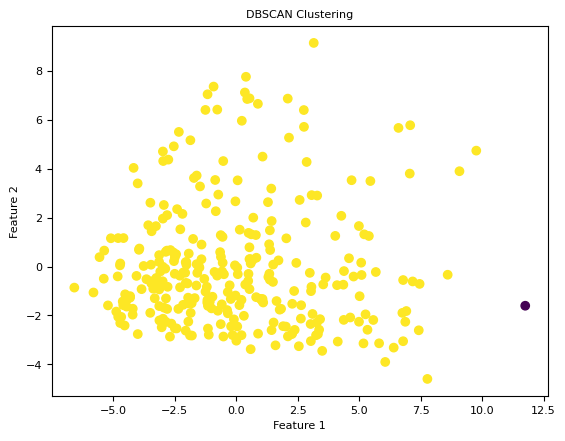

In [176]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

param_grid = {
    'eps': [1,2,3,4,5,6,7,8,9, 10],  # Try a range of epsilon values
    'min_samples': [10,20,30,40,50,60,70,80,90,100] }

best_score = -1
best_params = None

for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(scaled_data)
        
        # Only calculate silhouette score if there are more than 1 cluster
        if len(set(dbscan_labels)) > 1:
            sil_score = silhouette_score(scaled_data, dbscan_labels)
            print(f"eps={eps}, min_samples={min_samples}, Silhouette Score: {sil_score}")
            
            if sil_score > best_score:
                best_score = sil_score
                best_params = {'eps': eps, 'min_samples': min_samples}
                
print(f"Best Parameters for DBSCAN: {best_params}")

# Fit DBSCAN with the best parameters
dbscan_best = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
dbscan_labels = dbscan_best.fit_predict(scaled_data)

# Plotting Hierarchical Clustering
plot_clusters(pca_data, dbscan_labels, 'DBSCAN Clustering')


## DBSCAN Cluster Analysis
This approach performed poorly and is not useful at all. The poor results are likley due to the outliers in the dataset


Players in Each Cluster:
Cluster
-1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

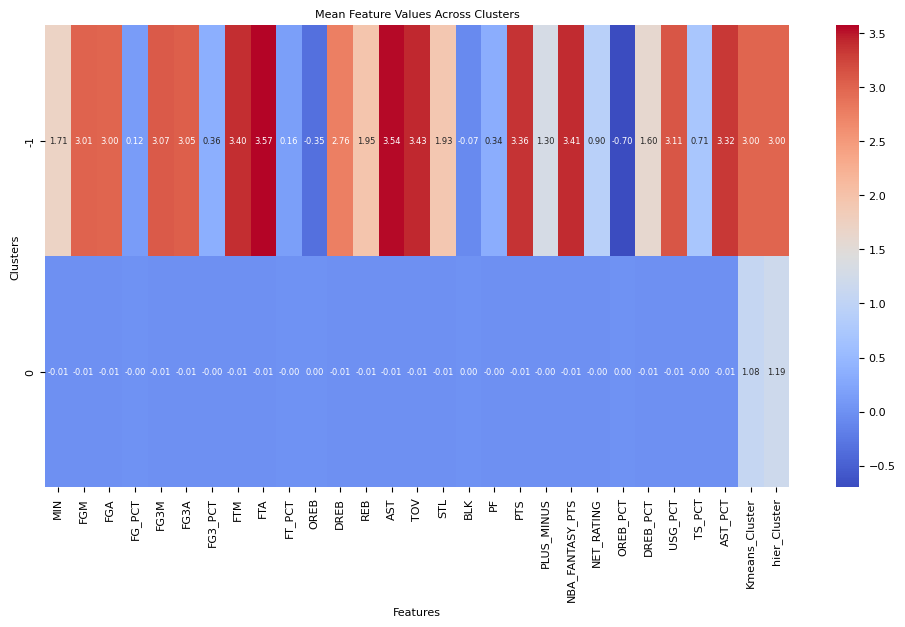

In [177]:
player_names = merged_df['PLAYER_NAME'].values

# Create a DataFrame with player names and their corresponding cluster labels
dbscan_clustered_players = pd.DataFrame({
    'Player': player_names,
    'Cluster': dbscan_labels
})

# Group by the cluster and display the players in each cluster
pd.set_option('display.max_rows', None)  # Show all rows in the output
pd.set_option('display.max_colwidth', None)  # Show full content of columns

# Now, print the players in each cluster
print("\nPlayers in Each Cluster:")
print(dbscan_clustered_players.groupby('Cluster')['Player'].apply(list))


# Get the mean statistics for each cluster for all features (ignoring the player name and cluster columns)
merged_df['dbscan_Cluster'] = dbscan_labels
mean_features = merged_df.drop(columns=['PLAYER_ID', 'PLAYER_NAME']).groupby('dbscan_Cluster').mean()

# Plot the mean values for each feature across the clusters
plt.figure(figsize=(12, 6))

# Use seaborn to create a heatmap for visualizing the mean values
sns.heatmap(mean_features, annot=True, cmap='coolwarm', fmt='.2f',  annot_kws={"size": 6})

plt.title('Mean Feature Values Across Clusters')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.xticks(rotation=90)
plt.show()

# Conclusion and Comparision of methods
In this project, I utilized unsupervised learning techniques, specifically K-Means, Hierarchical Clustering, and DBSCAN, to identify distinct clusters of NBA players based on their performance metrics. By analyzing both traditional and advanced player statistics, I successfully grouped players into four main archetypes: Role Players, Lower Quality Players, Traditional Big Men, and Superstars. These clusters provide valuable insights into the diversity of player roles and their impact on team dynamics, helping to better understand the varying levels of contributions players make to their respective teams.

While both K-Means and Hierarchical Clustering yielded similar groupings, the K-Means algorithm performed slightly better based on the Davies-Bouldin Index and Silhouette Score, which are key metrics for evaluating cluster quality. The Davies-Bouldin Index for K-Means (1.45) was marginally better than that for Hierarchical Clustering (1.50), indicating that K-Means created more distinct and compact clusters. Additionally, the Silhouette Score for K-Means (0.21) was slightly higher than that of Hierarchical Clustering (0.18), suggesting that K-Means provided more well-separated clusters.

On the other hand, DBSCAN did not perform well, likely due to the presence of outliers in the dataset. DBSCAN is sensitive to outliers, as it relies on density-based clustering, and may label sparse or unusual data points as noise (marked as -1). This can cause the algorithm to fail in grouping similar players together effectively, especially when the data contains a significant number of outliers. As a result, DBSCAN produced less meaningful clusters compared to K-Means and Hierarchical Clustering.

These results highlight the effectiveness of K-Means for this dataset, though both clustering approaches (K-Means and Hierarchical Clustering) have their merits depending on the goals of the analysis. Future work could explore other clustering algorithms or incorporate dimensionality reduction techniques like PCA to improve the interpretability of the clusters. Additionally, further analysis could examine player archetypes in relation to team success, player valuation, and roster optimization, providing actionable insights for NBA teams, coaches, and scouts.

By continuing to iterate on clustering strategies and refining the feature selection process, this project holds potential for uncovering deeper insights into player performance trends and optimizing team compositions.

In [178]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin scores
dbi_kmeans = davies_bouldin_score(pca_data, kmeans_labels)
dbi_hierarchical = davies_bouldin_score(pca_data, hierarchical_labels)

print(f"Davies-Bouldin Index for K-means: {dbi_kmeans}")
print(f"Davies-Bouldin Index for Hierarchical Clustering: {dbi_hierarchical}")

# Silhouette scores for K-means
sil_kmeans = silhouette_score(pca_data, kmeans_labels)

# Silhouette scores for Hierarchical
sil_hierarchical = silhouette_score(pca_data, hierarchical_labels)


print(f"Silhouette Score for K-means: {sil_kmeans}")
print(f"Silhouette Score for Hierarchical Clustering: {sil_hierarchical}")


Davies-Bouldin Index for K-means: 1.4500060871515412
Davies-Bouldin Index for Hierarchical Clustering: 1.5044559055763824
Silhouette Score for K-means: 0.20799051265025956
Silhouette Score for Hierarchical Clustering: 0.17688355385866575
